In [1]:
!nvidia-smi
import torch
print("torch.cuda.is_available():", torch.cuda.is_available())

Mon Dec  1 12:39:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data"

test  train  val


In [3]:
!echo "Train images:"
!ls "/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/train/images" | wc -l

!echo "Train labels:"
!ls "/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/train/labels" | wc -l

!echo "Test images:"
!ls "/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/images" | wc -l

!echo "Test labels:"
!ls "/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/labels" | wc -l


Train images:
166
Train labels:
166
Test images:
56
Test labels:
56


In [4]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.5 MB/s eta 0:00:00


In [5]:
data_yaml = """
path: /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data
train: train/images
val: val/images
test: test/images

names:
  0: apple
  1: banana
  2: orange
"""

with open("/content/data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml updated with validation split!")


data.yaml updated with validation split!


In [7]:
from ultralytics import YOLO

#  Load the YOLO model
model = YOLO("yolov8n.pt")  # pretrained model

#  Train the model
model.train(
    data="/content/data.yaml",  # path to yaml
    epochs=30,
    imgsz=640,
    batch=8,
    name="fruit_model",
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x791c71063620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [8]:
import shutil

shutil.copy(
    "/content/runs/detect/fruit_model/weights/best.pt",
    "/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/best_fruit_model.pt"
)


'/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/best_fruit_model.pt'

In [6]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/best_fruit_model.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [16]:
model.val(
    data="/content/data.yaml",
    split="val",
    plots=True
)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 0.8±0.2 ms, read: 0.2±0.2 MB/s, size: 87.9 KB)
val: Scanning /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/val/labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 42/42 28.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 24.0s/it 1:12
                   all         42         86       0.89      0.842      0.909      0.672
                 apple         21         37      0.883      0.892      0.946      0.744
                banana         18         30      0.892      0.633      0.795      0.489
                orange         14         19      0.894          1      0.988      0.784
Speed: 9.8ms preprocess, 271.9ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a623b7fdd00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [17]:
model.val(
    data="/content/data.yaml",
    split='test',
    plots=True
)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 1.0±0.8 ms, read: 28.4±16.3 MB/s, size: 115.5 KB)
val: Scanning /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 56/56 54.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.1s/it 16.3s
                   all         56        110      0.893      0.789      0.889      0.653
                 apple         22         33      0.933      0.844      0.924      0.747
                banana         21         36      0.881      0.694      0.843      0.534
                orange         21         41      0.865      0.829      0.899      0.678
Speed: 4.7ms preprocess, 248.6ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a6233d5c530>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [8]:
results = model.predict(
    source="/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/images",
    save=True,
    conf=0.25
)



image 1/56 /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/images/apple_77.jpg: 512x640 4 apples, 367.9ms
image 2/56 /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/images/apple_78.jpg: 640x640 1 apple, 211.0ms
image 3/56 /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/images/apple_80.jpg: 544x640 1 apple, 173.5ms
image 4/56 /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/images/apple_81.jpg: 640x576 1 apple, 274.3ms
image 5/56 /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/images/apple_82.jpg: 640x576 1 apple, 168.8ms
image 6/56 /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/images/apple_83.jpg: 608x640 1 apple, 185.9ms
image 7/56 /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/images/apple_84.jpg: 448x640 3 apples, 141.2ms
image 8/56 /content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Data/test/images/apple_85.jpg: 512x640 1 apple, 158.2ms
image 9/56 /content/drive/MyD

In [18]:
import shutil
import os

source = "/content/runs/detect"
dest = "/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Evaluation_Results"

# Create destination folder
os.makedirs(dest, exist_ok=True)

# Copy everything
shutil.copytree(source, dest, dirs_exist_ok=True)

print("All YOLO prediction + evaluation outputs saved to Google Drive!")


All YOLO prediction + evaluation outputs saved to Google Drive!


In [19]:
import os
os.listdir("/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Evaluation_Results")


['predict', 'val', 'val2']

In [25]:
from IPython.display import Image
#Image("/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Evaluation_Results/val/confusion_matrix.png")

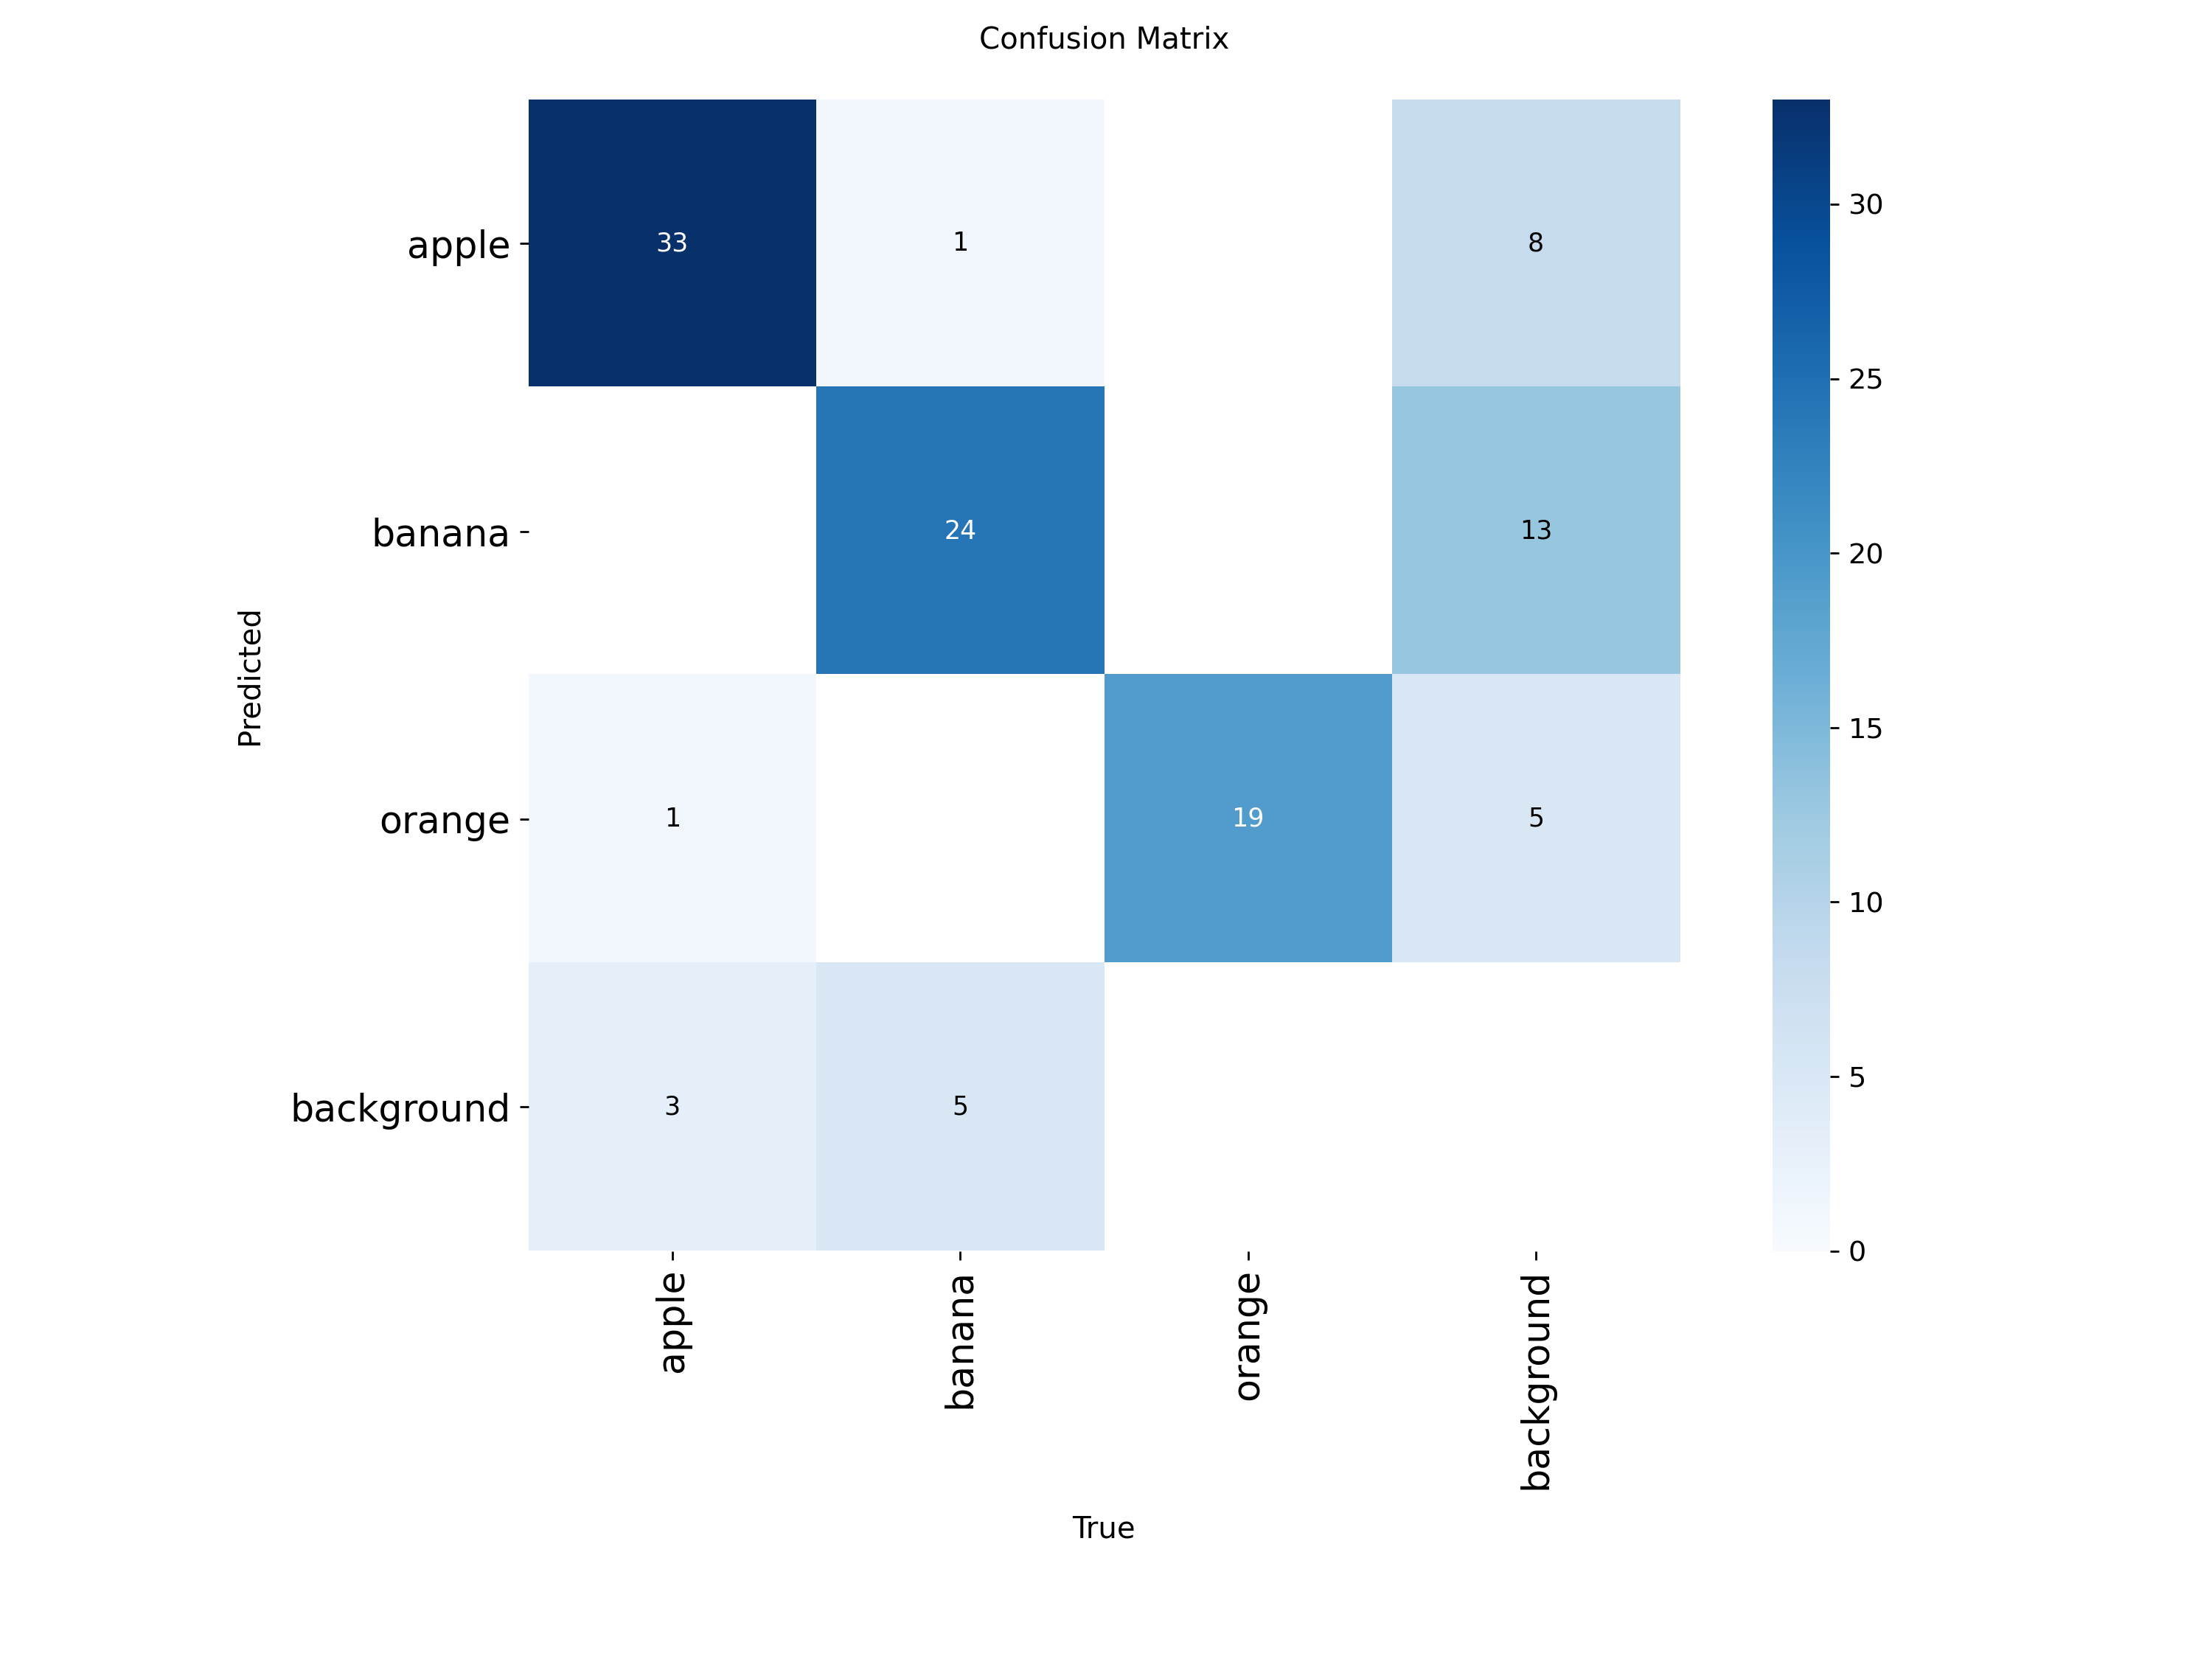

In [14]:
from IPython.display import Image, display

display(Image(filename="/content/runs/detect/val/confusion_matrix.png"))


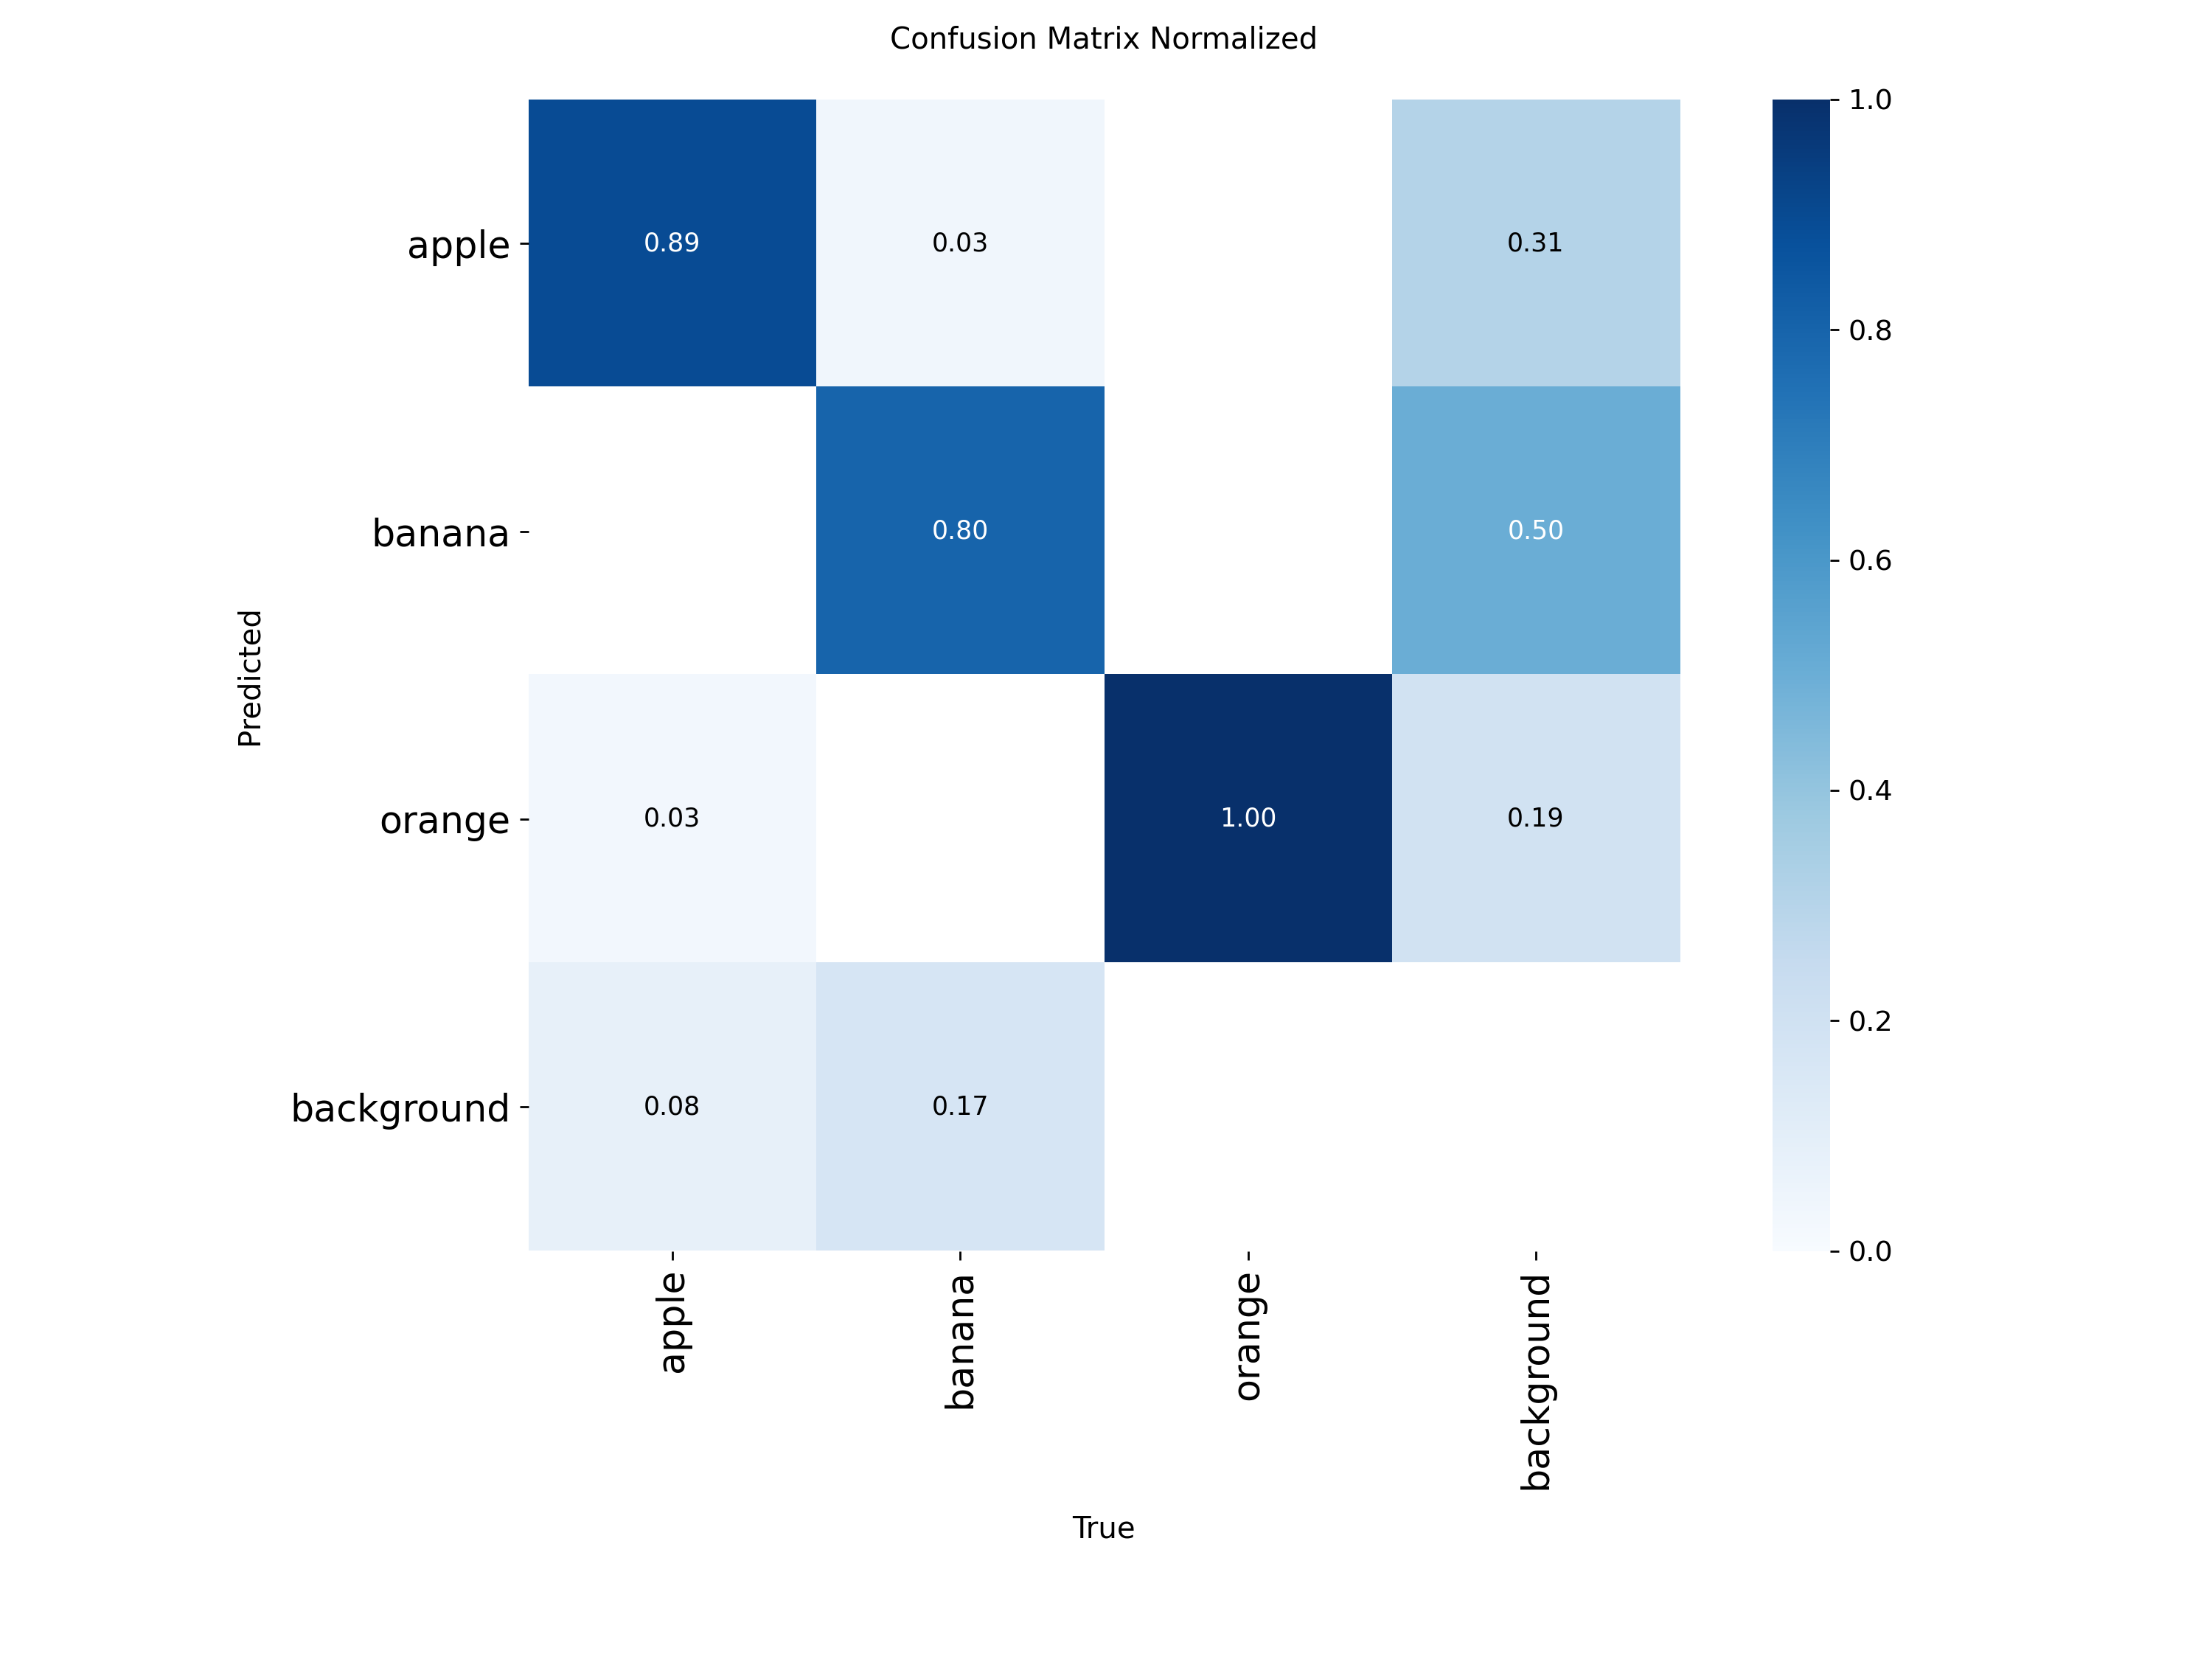

In [15]:
display(Image(filename="/content/runs/detect/val/confusion_matrix_normalized.png"))


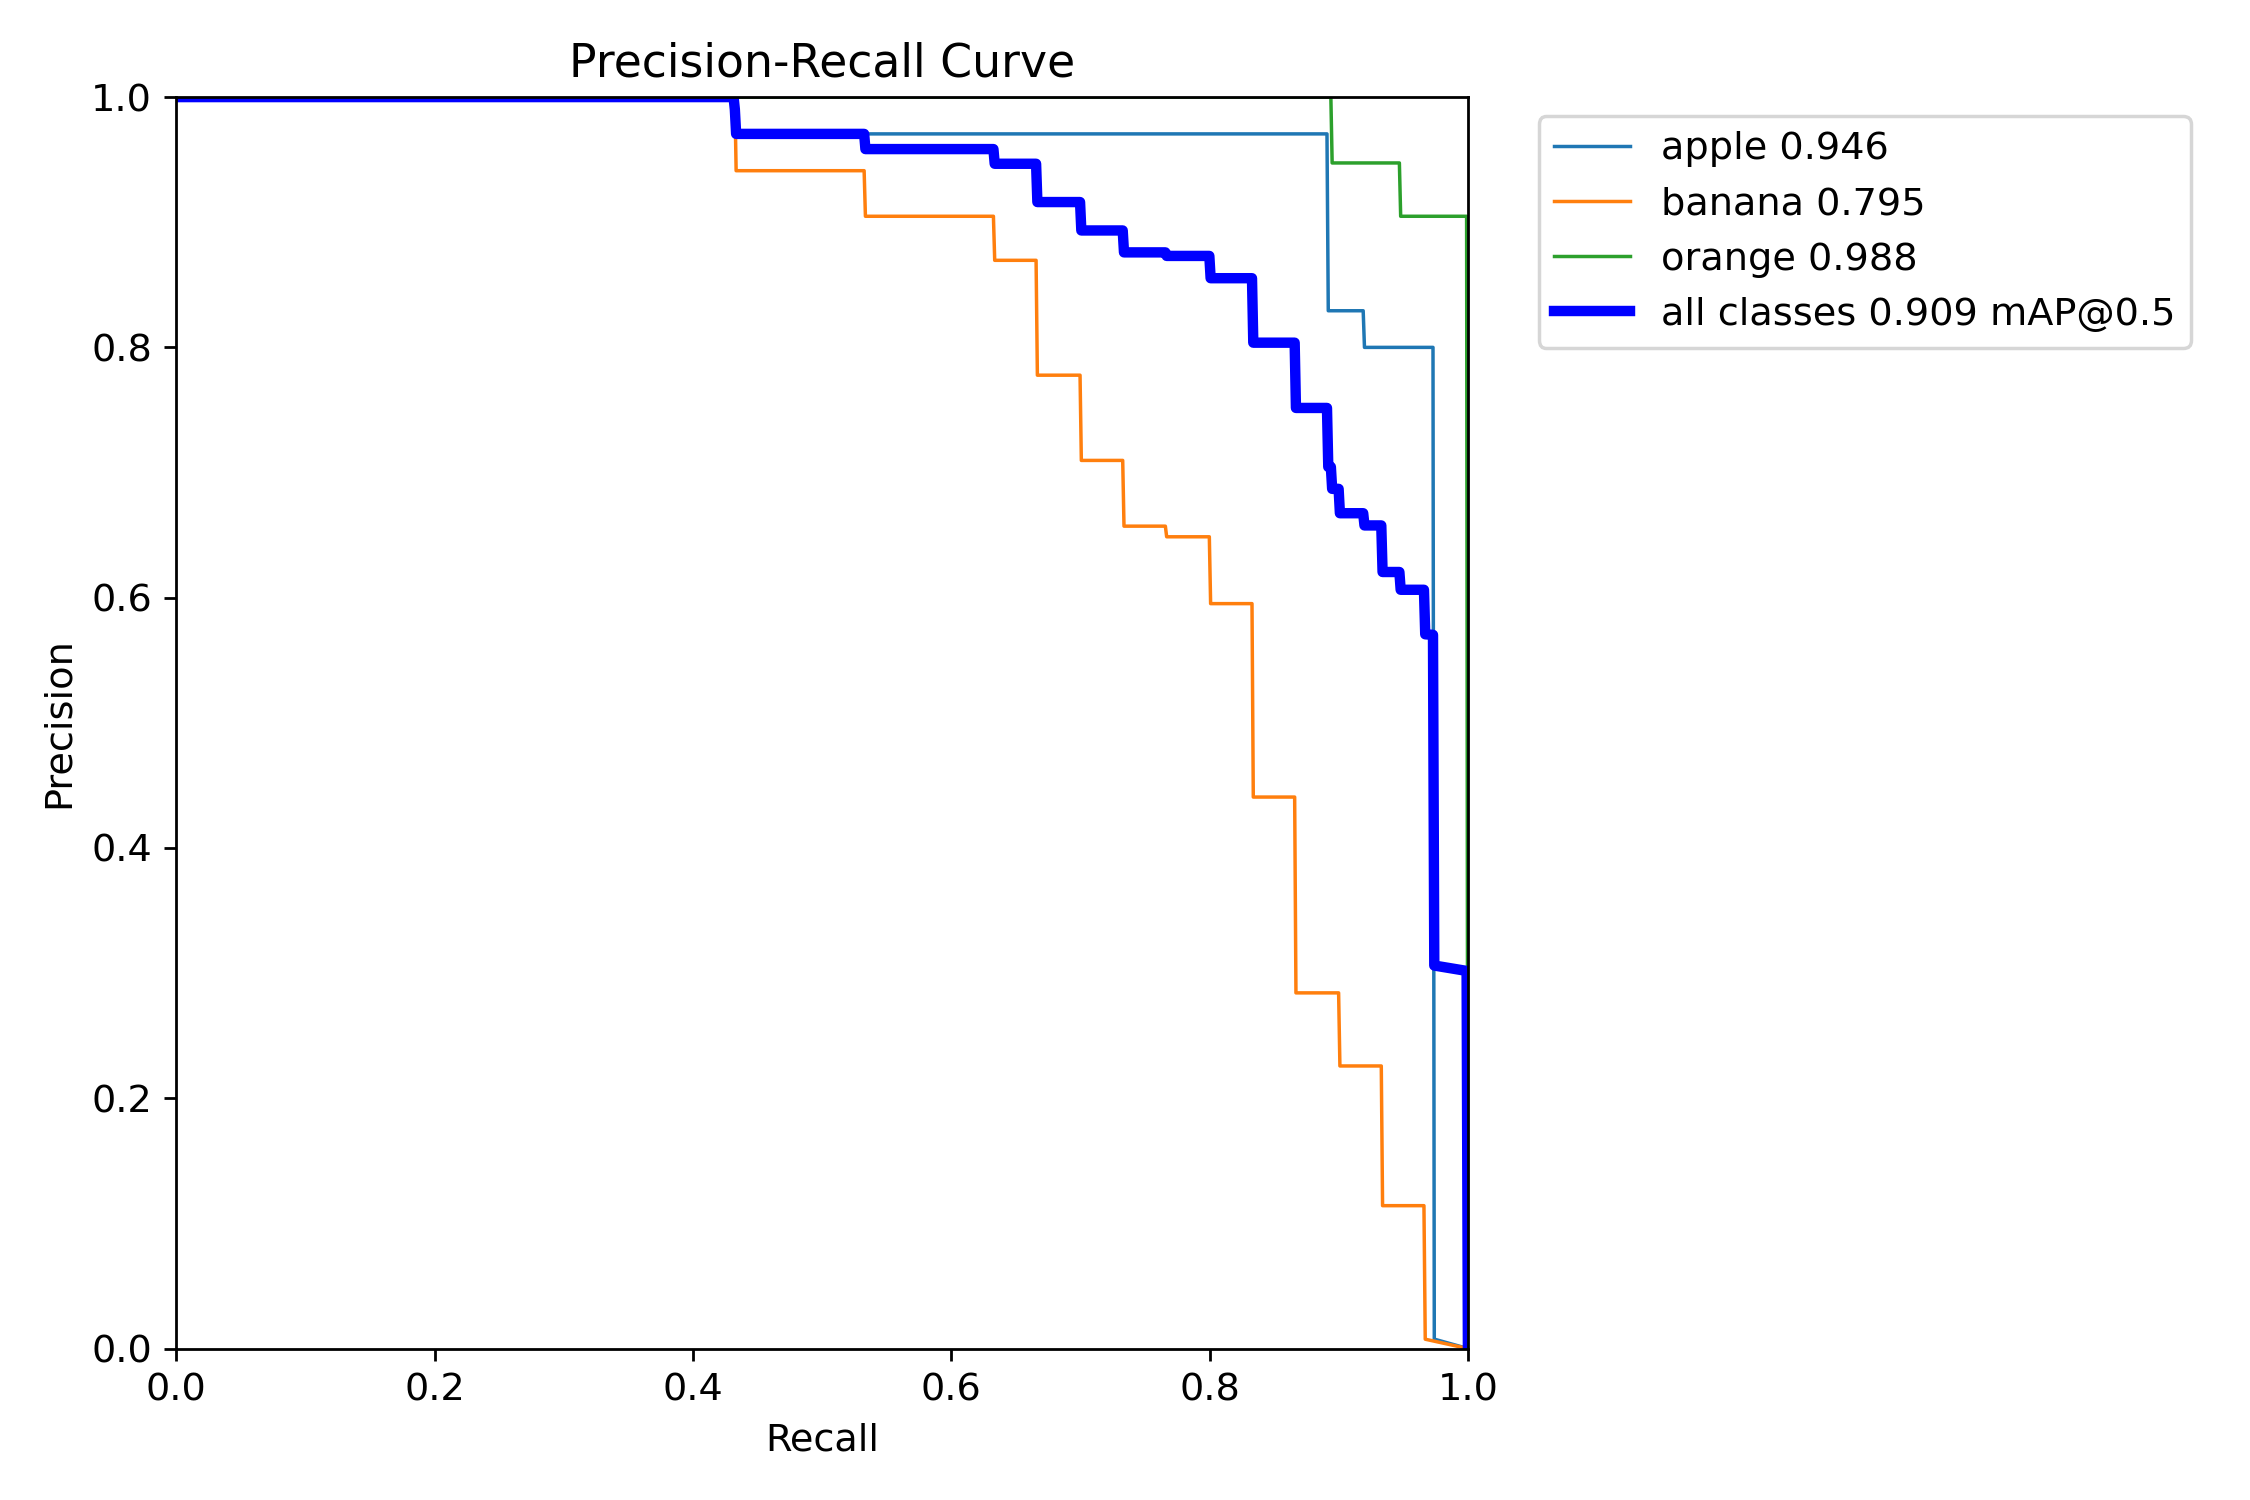

In [16]:
display(Image(filename="/content/runs/detect/val/BoxPR_curve.png"))


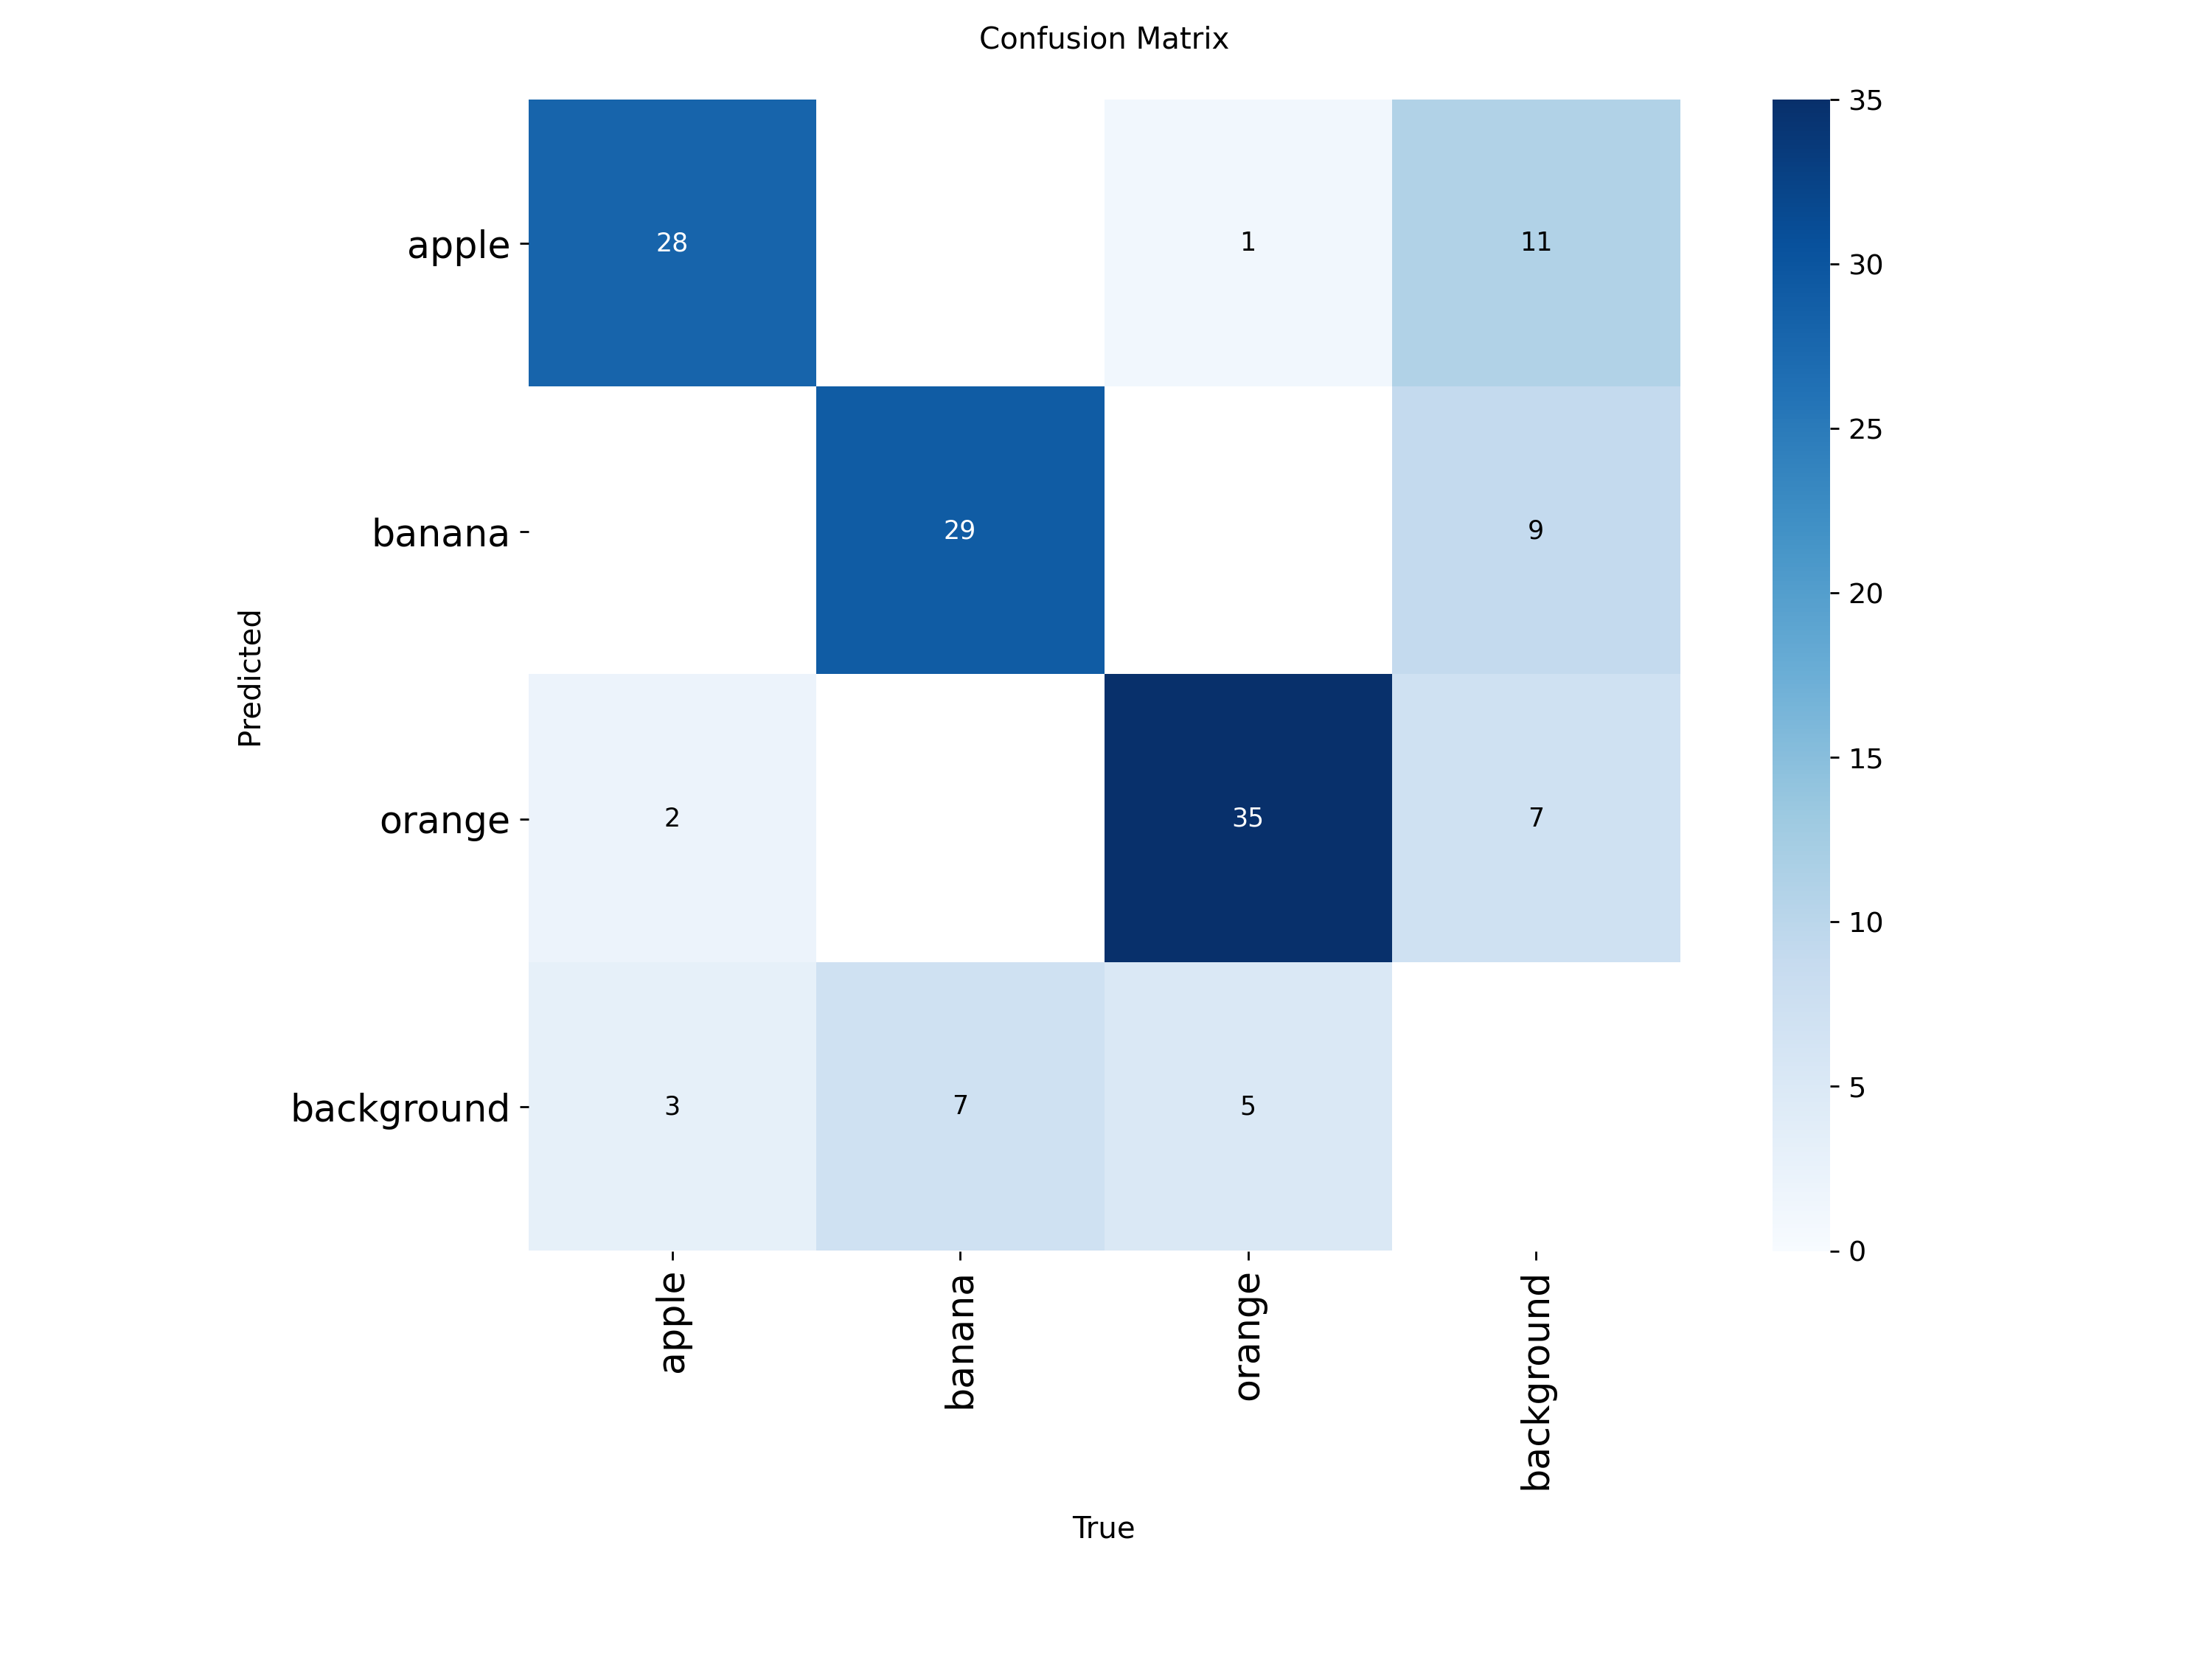

In [17]:
display(Image(filename="/content/runs/detect/val2/confusion_matrix.png"))


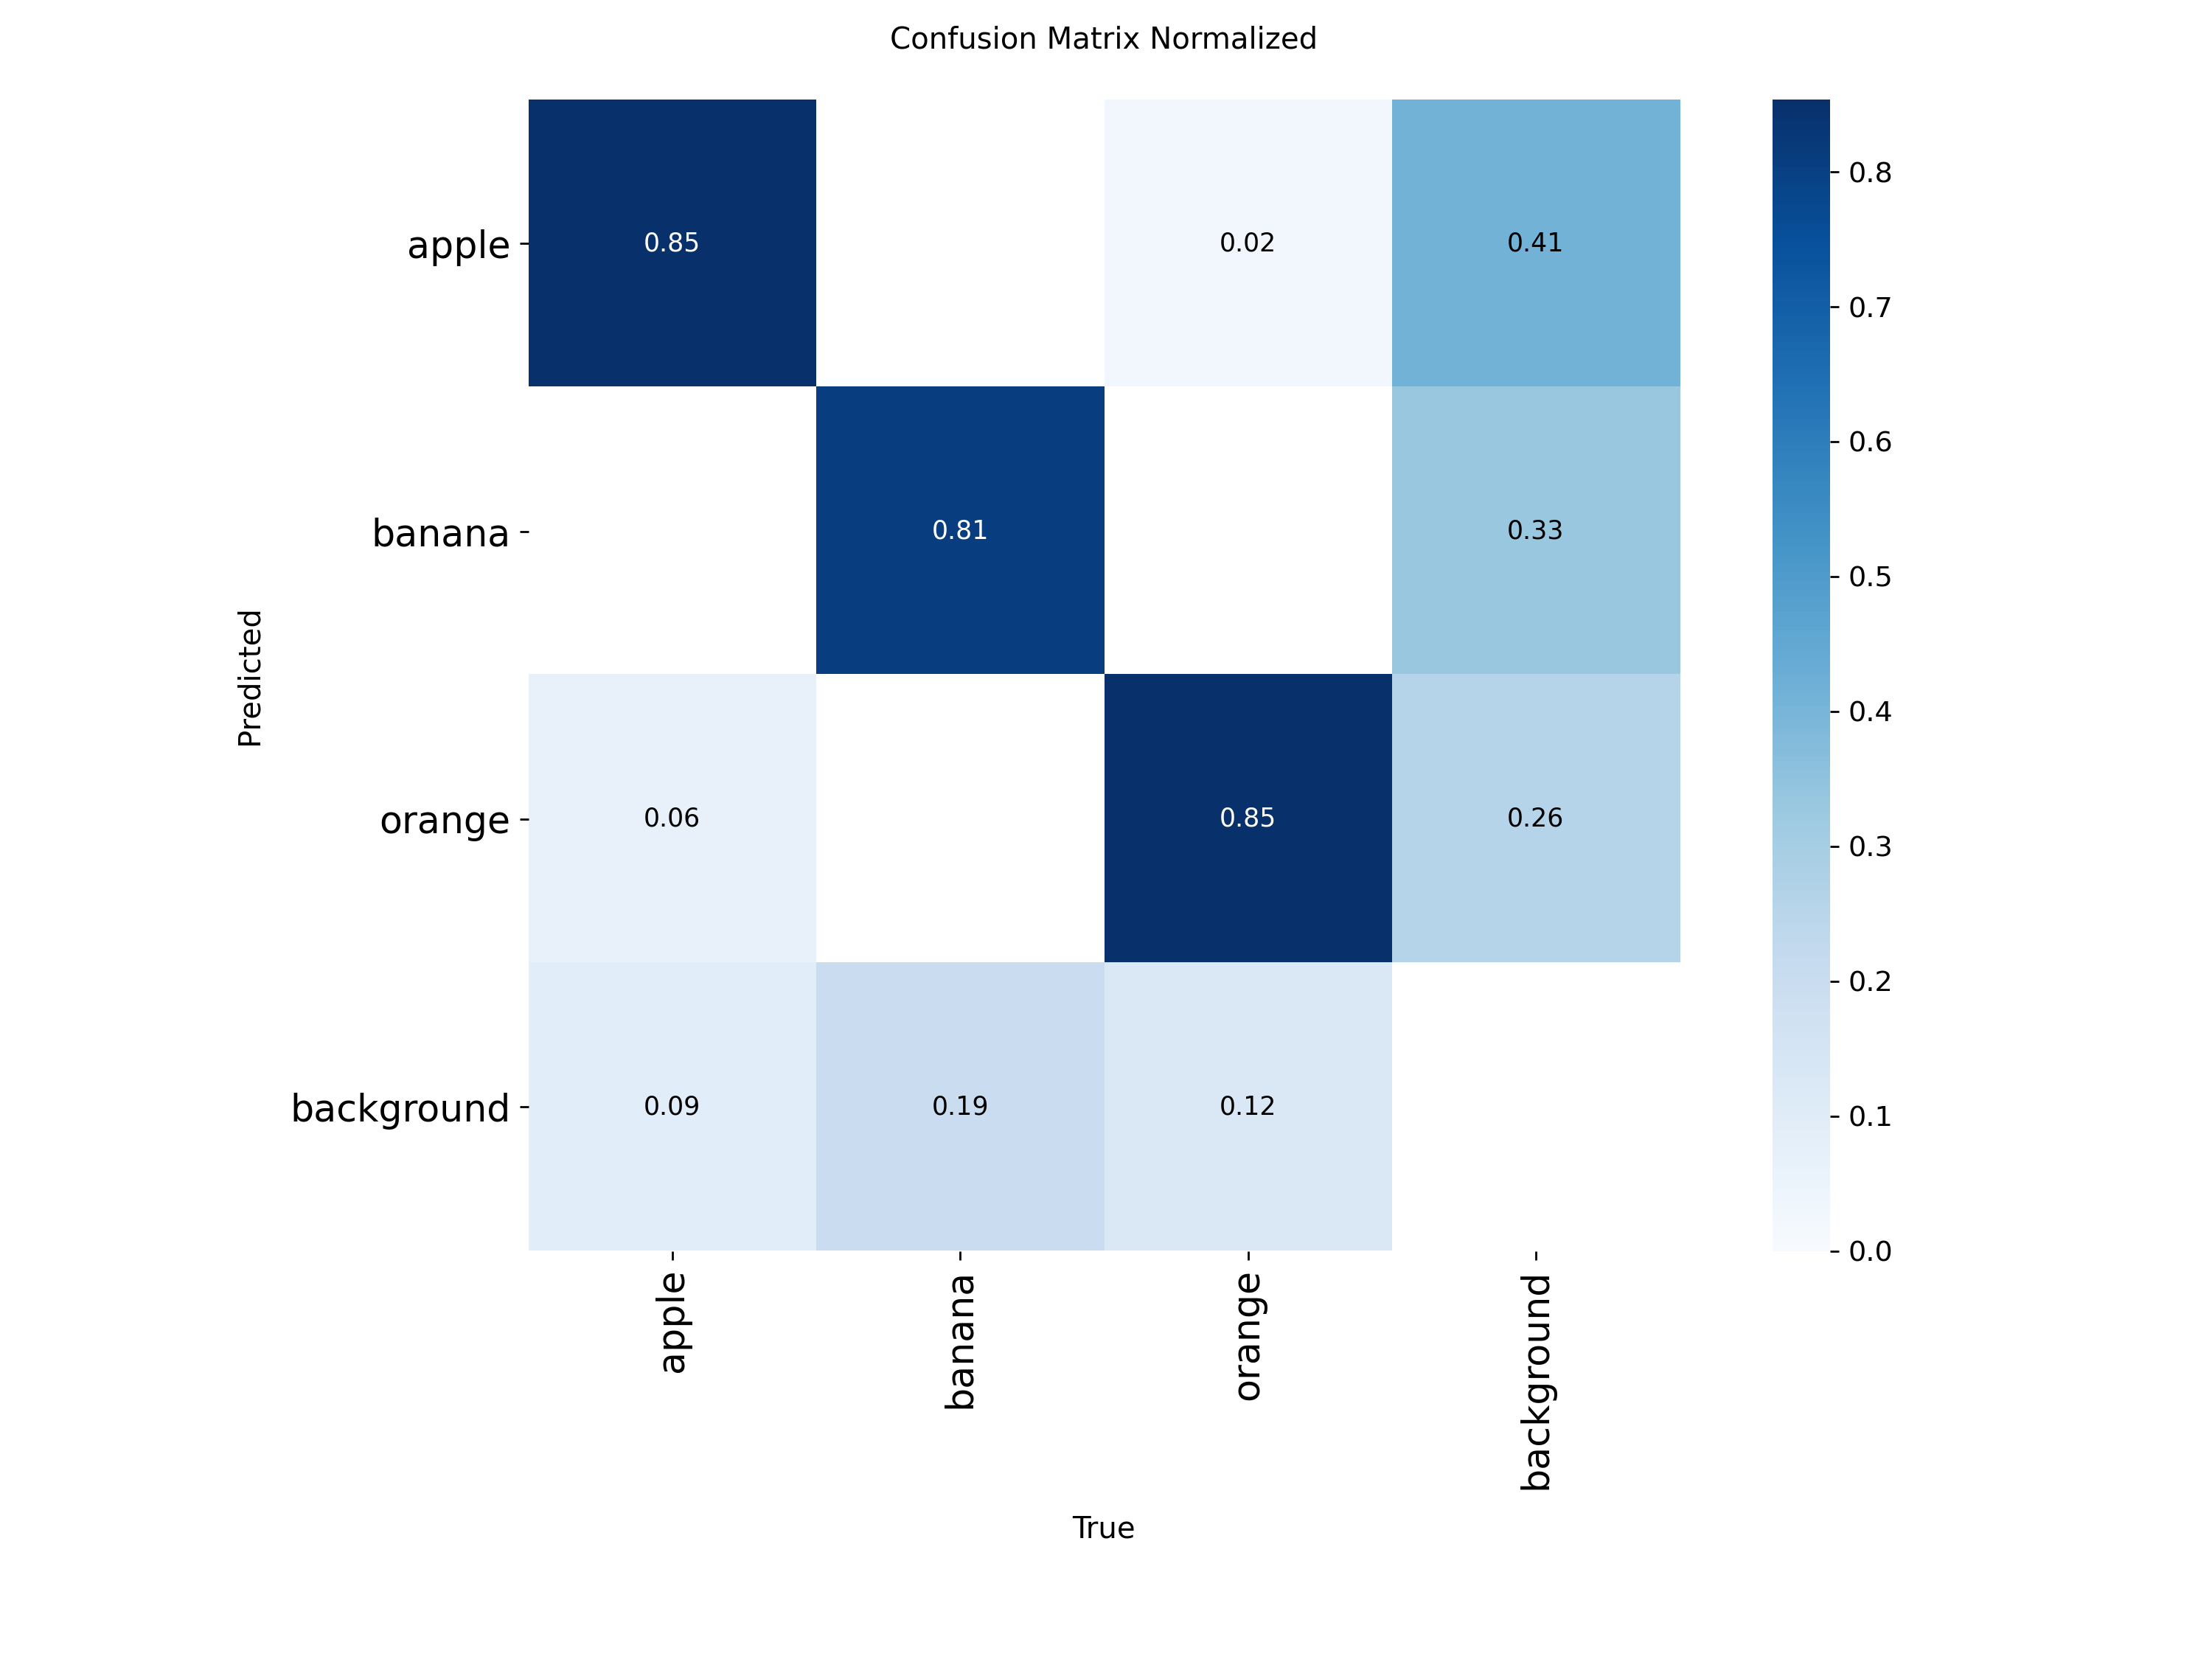

In [18]:
display(Image(filename="/content/runs/detect/val2/confusion_matrix_normalized.png"))


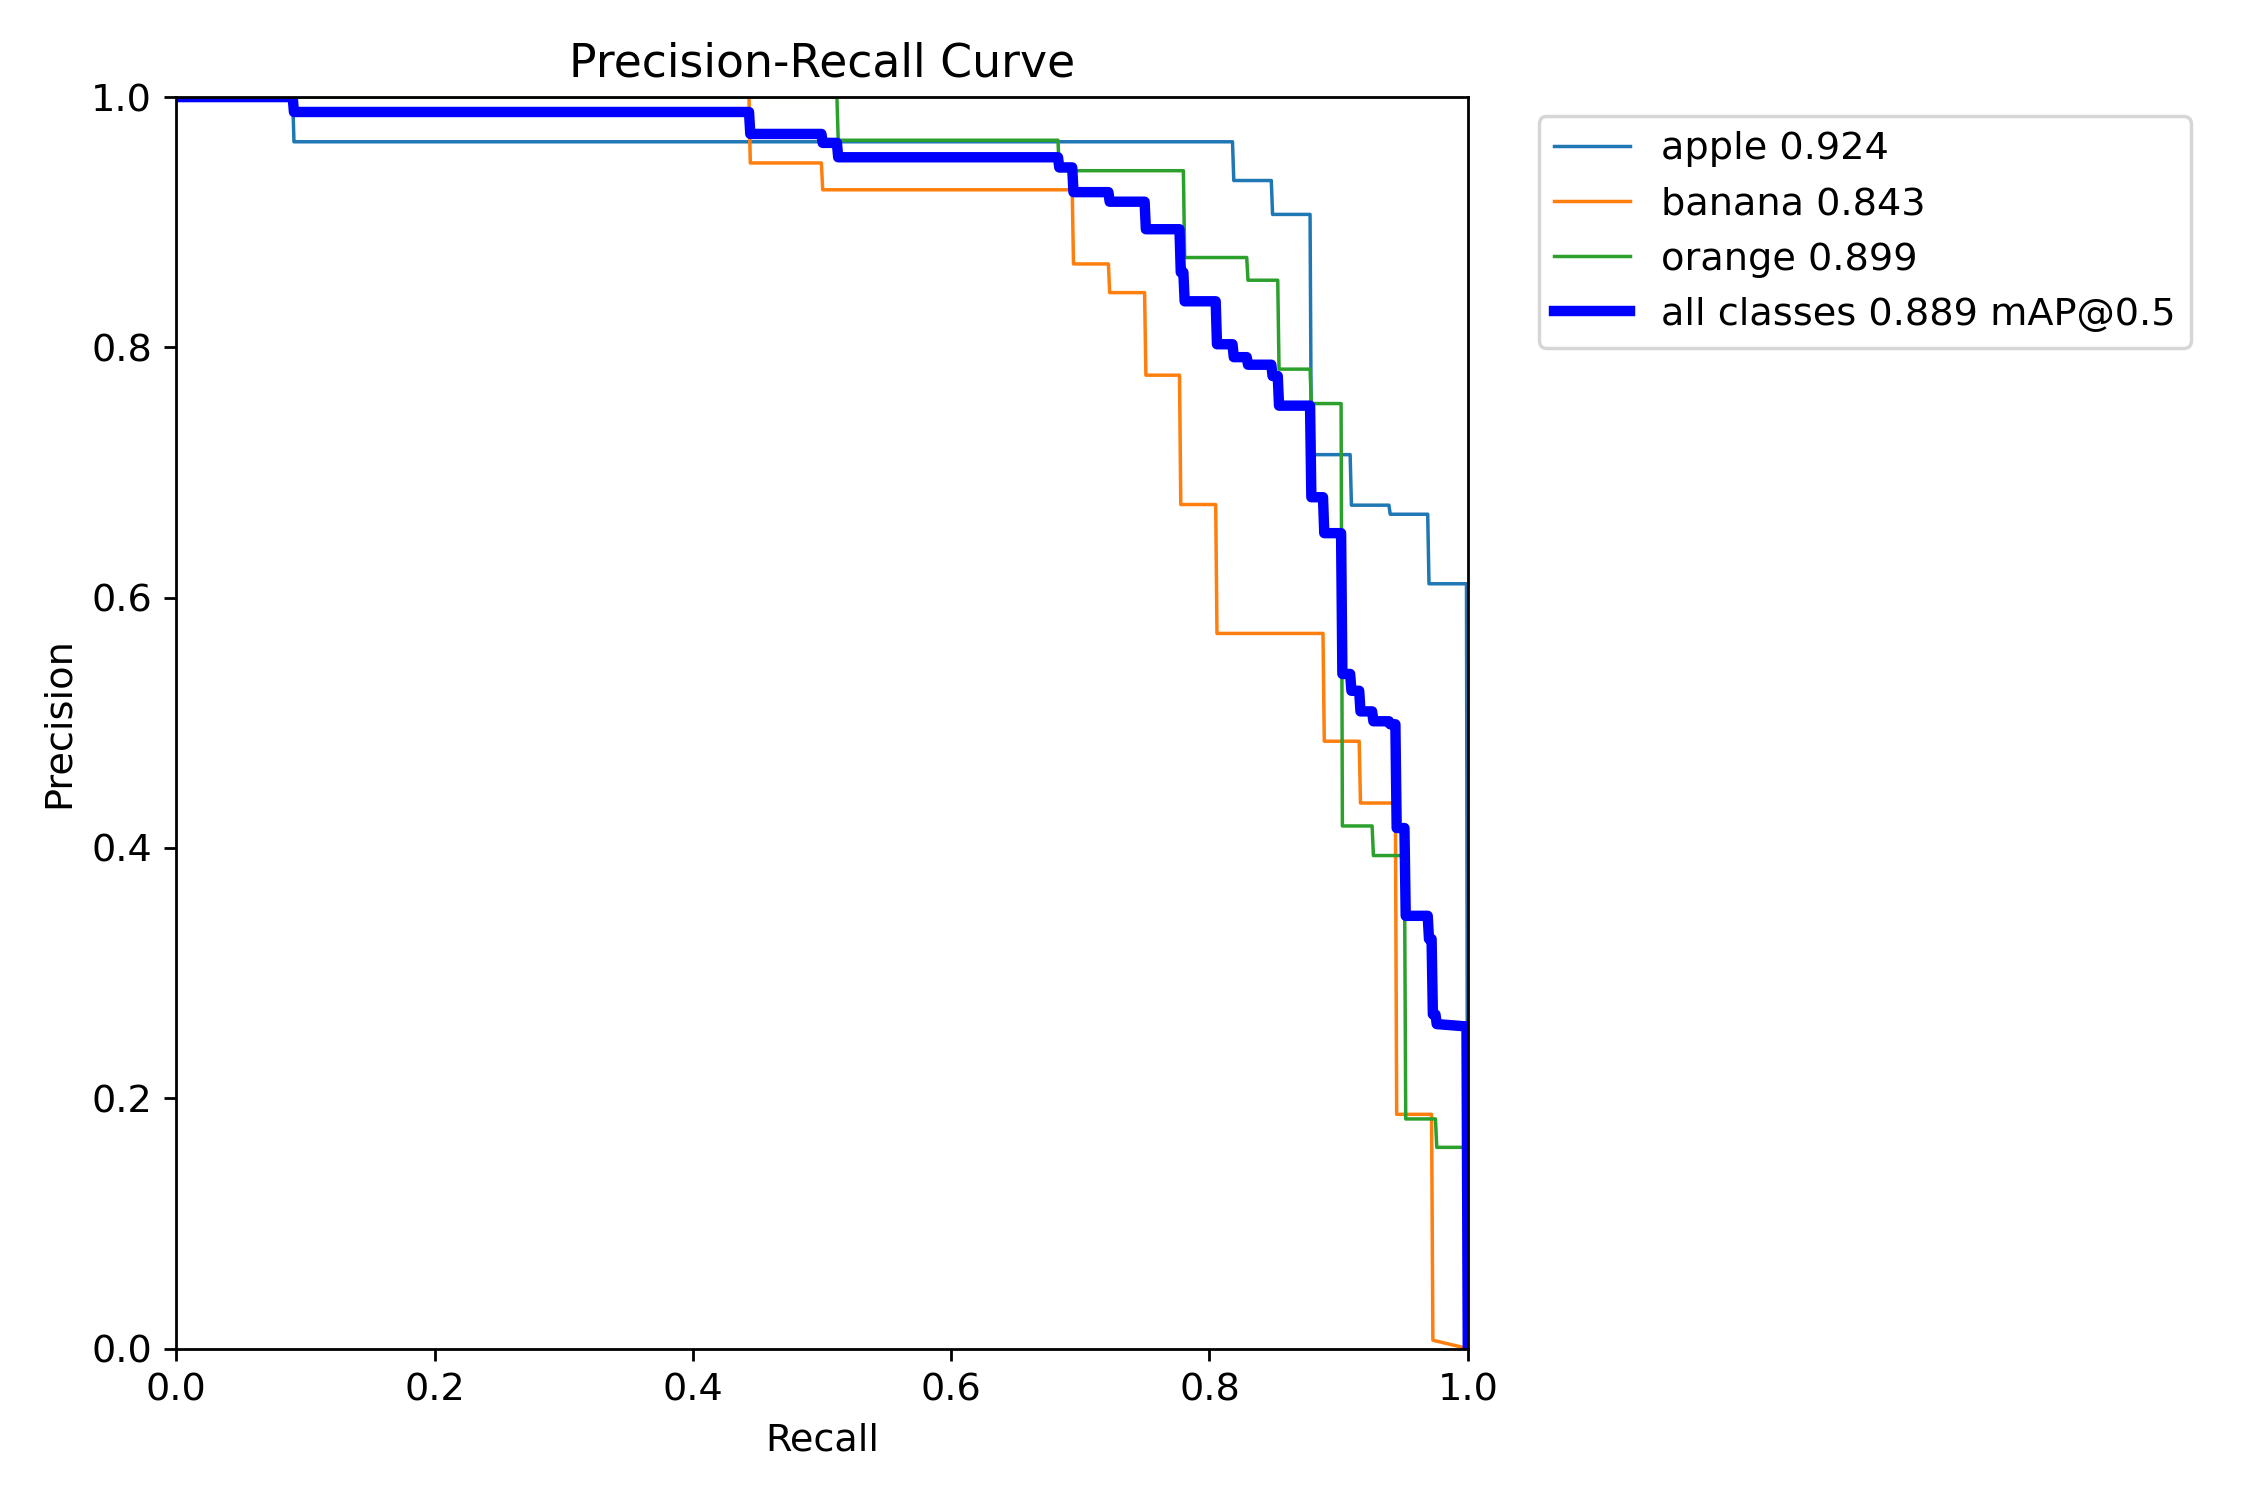

In [19]:
display(Image(filename="/content/runs/detect/val2/BoxPR_curve.png"))


In [9]:
import os
os.listdir("/content/runs/detect/predict")


['banana_79.jpg',
 'apple_87.jpg',
 'mixed_22.jpg',
 'orange_85.jpg',
 'banana_84.jpg',
 'apple_86.jpg',
 'mixed_24.jpg',
 'banana_83.jpg',
 'orange_83.jpg',
 'apple_94.jpg',
 'banana_90.jpg',
 'banana_91.jpg',
 'orange_78.jpg',
 'orange_90.jpg',
 'apple_93.jpg',
 'banana_86.jpg',
 'banana_77.jpg',
 'apple_83.jpg',
 'apple_82.jpg',
 'apple_84.jpg',
 'apple_78.jpg',
 'mixed_25.jpg',
 'orange_77.jpg',
 'banana_89.jpg',
 'apple_91.jpg',
 'banana_78.jpg',
 'mixed_23.jpg',
 'orange_95.jpg',
 'apple_89.jpg',
 'orange_79.jpg',
 'banana_94.jpg',
 'orange_86.jpg',
 'orange_92.jpg',
 'banana_85.jpg',
 'apple_88.jpg',
 'banana_93.jpg',
 'mixed_21.jpg',
 'orange_84.jpg',
 'apple_77.jpg',
 'orange_81.jpg',
 'apple_80.jpg',
 'apple_95.jpg',
 'banana_92.jpg',
 'orange_91.jpg',
 'banana_88.jpg',
 'orange_80.jpg',
 'orange_87.jpg',
 'banana_80.jpg',
 'banana_82.jpg',
 'orange_89.jpg',
 'apple_81.jpg',
 'banana_81.jpg',
 'orange_93.jpg',
 'apple_90.jpg',
 'orange_82.jpg',
 'apple_85.jpg']

In [12]:
from IPython.display import Image, display
import os

pred_path = "/content/runs/detect/predict"

for file in os.listdir(pred_path):
    if file.endswith(".jpg"):
        display(Image(filename=os.path.join(pred_path, file)))


Output hidden; open in https://colab.research.google.com to view.

In [13]:
import shutil
import os

source = "/content/runs/detect/predict"
dest = "/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Test_Prediction_Results"

# Create destination folder if not exists
os.makedirs(dest, exist_ok=True)

# Copy entire folder
shutil.copytree(source, dest, dirs_exist_ok=True)

print("✅ All prediction output images saved to Google Drive successfully!")


✅ All prediction output images saved to Google Drive successfully!


In [14]:
import os
print(os.listdir("/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Test_Prediction_Results"))



['banana_79.jpg', 'apple_87.jpg', 'mixed_22.jpg', 'orange_85.jpg', 'banana_84.jpg', 'apple_86.jpg', 'mixed_24.jpg', 'banana_83.jpg', 'orange_83.jpg', 'apple_94.jpg', 'banana_90.jpg', 'banana_91.jpg', 'orange_78.jpg', 'orange_90.jpg', 'apple_93.jpg', 'banana_86.jpg', 'banana_77.jpg', 'apple_83.jpg', 'apple_82.jpg', 'apple_84.jpg', 'apple_78.jpg', 'mixed_25.jpg', 'orange_77.jpg', 'banana_89.jpg', 'apple_91.jpg', 'banana_78.jpg', 'mixed_23.jpg', 'orange_95.jpg', 'apple_89.jpg', 'orange_79.jpg', 'banana_94.jpg', 'orange_86.jpg', 'orange_92.jpg', 'banana_85.jpg', 'apple_88.jpg', 'banana_93.jpg', 'mixed_21.jpg', 'orange_84.jpg', 'apple_77.jpg', 'orange_81.jpg', 'apple_80.jpg', 'apple_95.jpg', 'banana_92.jpg', 'orange_91.jpg', 'banana_88.jpg', 'orange_80.jpg', 'orange_87.jpg', 'banana_80.jpg', 'banana_82.jpg', 'orange_89.jpg', 'apple_81.jpg', 'banana_81.jpg', 'orange_93.jpg', 'apple_90.jpg', 'orange_82.jpg', 'apple_85.jpg']


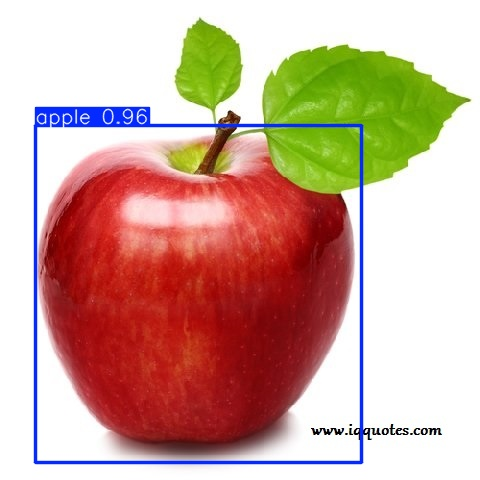

In [15]:
from IPython.display import Image, display

display(Image("/content/drive/MyDrive/Fruit_Object_Dataset/Project_1/Test_Prediction_Results/apple_87.jpg"))
